In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [148]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

In [149]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [150]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [151]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Week1_challenge_data_source contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Week1_challenge_data_source contains 12.5 % missing values.


In [152]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [153]:
# drop columns with more than 30% missing values
df_clean = db.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 45)

In [154]:
# Now which column(s) has missing values
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [155]:
# fill missing with ffill method

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

# fill missing with bfill method

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

# fill missing with mode method

def fix_missing_mode(df,col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]
    
# fill missing with ffill method for columns numeric data type 

df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['MSISDN/Number'] = fix_missing_ffill(df_clean, 'MSISDN/Number')
df_clean['IMEIdiag_3'] = fix_missing_ffill(df_clean, 'IMEI')
df_clean['Avg RTT DL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT DL (ms)')
df_clean['Avg RTT UL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT UL (ms)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
 


# fill  none numbers type columns with mode
df_clean['Last Location Name'] = fix_missing_mode(df_clean, 'Last Location Name')
df_clean['Handset Manufacturer'] = fix_missing_mode(df_clean, 'Handset Manufacturer')
df_clean['Handset Type'] = fix_missing_mode(df_clean, 'Handset Type')


In [156]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [157]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

#### some totals to be used on each application

In [158]:
df_clean['total_data_volume'] =df_clean['Total DL (Bytes)']+df_clean['Total UL (Bytes)']
df_clean['social_media volume'] = df_clean['Social Media DL (Bytes)'] + df_clean['Social Media UL (Bytes)']
df_clean['email volume'] = df_clean['Email DL (Bytes)'] + df_clean['Email UL (Bytes)']
df_clean['google volume'] = df_clean['Google DL (Bytes)'] + df_clean['Google UL (Bytes)']
df_clean['youtube volume'] = df_clean['Youtube DL (Bytes)'] + df_clean['Youtube UL (Bytes)']
df_clean['netflix volume'] = df_clean['Netflix UL (Bytes)'] + df_clean['Netflix DL (Bytes)']
df_clean['gaming volume'] = df_clean['Gaming DL (Bytes)'] + df_clean['Gaming UL (Bytes)']
df_clean['other volume'] = df_clean['Other DL (Bytes)'] + df_clean['Other UL (Bytes)']
df_clean['total_tp volume'] = df_clean['Avg Bearer TP DL (kbps)'] + df_clean['Avg Bearer TP UL (kbps)']
df_clean['total_rtt volume'] = df_clean['Avg RTT DL (ms)'] + df_clean['Avg RTT UL (ms)']
# df_clean['total_tcp'] = df_clean['TCP DL Retrans. Vol (Bytes)'] + df_clean['TCP UL Retrans. Vol (Bytes)']

In [159]:
grouped_Durration = df_clean.groupby('MSISDN/Number').agg({'Bearer Id': ['mean', 'min', 'max']})

print(grouped_Durration)

                                           Bearer Id  \
                                                mean   
MSISDN/Number                                          
33,601,001,722.00      13,114,483,554,762,799,104.00   
33,601,001,754.00       7,349,883,260,786,089,984.00   
33,601,002,511.00       7,349,883,263,388,680,192.00   
33,601,007,832.00      13,042,425,972,781,099,008.00   
33,601,008,617.00       7,313,854,452,859,459,584.00   
...                                              ...   
33,789,996,170.00      13,042,425,959,639,599,104.00   
33,789,997,247.00      13,114,483,558,421,200,896.00   
3,197,020,876,596.00    7,277,825,624,788,950,016.00   
337,000,037,000,919.00  7,349,883,258,102,979,584.00   
882,397,108,489,451.00  7,277,825,601,573,409,792.00   

                                                      \
                                                 min   
MSISDN/Number                                          
33,601,001,722.00      13,114,483,554,762,799,1

In [160]:
grouped_Durration = df_clean.groupby('MSISDN/Number').agg({'Dur. (ms)': ['mean', 'min', 'max','sum']})

print(grouped_Durration)

                        Dur. (ms)                                 
                             mean        min        max        sum
MSISDN/Number                                                     
33,601,001,722.00      116,720.00 116,720.00 116,720.00 116,720.00
33,601,001,754.00      181,230.00 181,230.00 181,230.00 181,230.00
33,601,002,511.00      134,969.00 134,969.00 134,969.00 134,969.00
33,601,007,832.00       49,878.00  49,878.00  49,878.00  49,878.00
33,601,008,617.00       18,552.00  18,549.00  18,555.00  37,104.00
...                           ...        ...        ...        ...
33,789,996,170.00        8,810.00   8,810.00   8,810.00   8,810.00
33,789,997,247.00      140,988.00 140,988.00 140,988.00 140,988.00
3,197,020,876,596.00   877,385.00 877,385.00 877,385.00 877,385.00
337,000,037,000,919.00 253,030.00 253,030.00 253,030.00 253,030.00
882,397,108,489,451.00 869,844.00 869,844.00 869,844.00 869,844.00

[106856 rows x 4 columns]


In [161]:
grouped_Total_UL = df_clean.groupby('MSISDN/Number').agg({'Total UL (Bytes)': ['mean', 'min', 'max','sum']})

print(grouped_Total_UL)

                       Total UL (Bytes)                              \
                                   mean           min           max   
MSISDN/Number                                                         
33,601,001,722.00         36,053,108.00 36,053,108.00 36,053,108.00   
33,601,001,754.00         36,104,459.00 36,104,459.00 36,104,459.00   
33,601,002,511.00         39,306,820.00 39,306,820.00 39,306,820.00   
33,601,007,832.00         20,327,526.00 20,327,526.00 20,327,526.00   
33,601,008,617.00         47,140,263.50 38,481,427.00 55,799,100.00   
...                                 ...           ...           ...   
33,789,996,170.00         26,716,429.00 26,716,429.00 26,716,429.00   
33,789,997,247.00         35,732,243.00 35,732,243.00 35,732,243.00   
3,197,020,876,596.00      37,295,915.00 37,295,915.00 37,295,915.00   
337,000,037,000,919.00    56,652,839.00 56,652,839.00 56,652,839.00   
882,397,108,489,451.00    60,456,049.00 60,456,049.00 60,456,049.00   

     

In [162]:
grouped_Total_DL = df_clean.groupby('MSISDN/Number').agg({'Total DL (Bytes)': ['mean', 'min', 'max','sum']})

print(grouped_Total_DL)

                       Total DL (Bytes)                                \
                                   mean            min            max   
MSISDN/Number                                                           
33,601,001,722.00        842,637,466.00 842,637,466.00 842,637,466.00   
33,601,001,754.00        120,755,184.00 120,755,184.00 120,755,184.00   
33,601,002,511.00        556,659,663.00 556,659,663.00 556,659,663.00   
33,601,007,832.00        401,993,172.00 401,993,172.00 401,993,172.00   
33,601,008,617.00        681,565,208.50 547,096,937.00 816,033,480.00   
...                                 ...            ...            ...   
33,789,996,170.00        687,925,212.00 687,925,212.00 687,925,212.00   
33,789,997,247.00        444,575,092.00 444,575,092.00 444,575,092.00   
3,197,020,876,596.00     194,828,056.00 194,828,056.00 194,828,056.00   
337,000,037,000,919.00   539,634,985.00 539,634,985.00 539,634,985.00   
882,397,108,489,451.00    78,697,597.00  78,697,597

In [163]:
grouped_total_data_volume = df_clean.groupby('MSISDN/Number').agg({'total_data_volume': ['mean', 'min', 'max','sum']})

print(grouped_total_data_volume)

                       total_data_volume                                \
                                    mean            min            max   
MSISDN/Number                                                            
33,601,001,722.00         878,690,574.00 878,690,574.00 878,690,574.00   
33,601,001,754.00         156,859,643.00 156,859,643.00 156,859,643.00   
33,601,002,511.00         595,966,483.00 595,966,483.00 595,966,483.00   
33,601,007,832.00         422,320,698.00 422,320,698.00 422,320,698.00   
33,601,008,617.00         728,705,472.00 585,578,364.00 871,832,580.00   
...                                  ...            ...            ...   
33,789,996,170.00         714,641,641.00 714,641,641.00 714,641,641.00   
33,789,997,247.00         480,307,335.00 480,307,335.00 480,307,335.00   
3,197,020,876,596.00      232,123,971.00 232,123,971.00 232,123,971.00   
337,000,037,000,919.00    596,287,824.00 596,287,824.00 596,287,824.00   
882,397,108,489,451.00    139,153,646.

In [164]:
# sns.pairplot(df_clean)


### top 10 handsets  used by the customers

In [165]:
# top 10 handsets  used by the customers
handsets_dict ={}
count = 1

for items in df_clean['Handset Type']:
    
    if items in handsets_dict.keys():
        handsets_dict[items]= handsets_dict[items]+1
    else:
        handsets_dict[items]=count
# handsets_dict
sorted_handsets_dict = sorted(handsets_dict.items(), key=lambda kv: kv[1],reverse=True)
        
# sorted_handsets_dict[:10] 
for n in sorted_handsets_dict[:10]:
    print(n[0])
        
    
    
    

Huawei B528S-23A
Apple iPhone 6S (A1688)
Apple iPhone 6 (A1586)
undefined
Apple iPhone 7 (A1778)
Apple iPhone Se (A1723)
Apple iPhone 8 (A1905)
Apple iPhone Xr (A2105)
Samsung Galaxy S8 (Sm-G950F)
Apple iPhone X (A1901)


### top 3 handset manufacturers

In [166]:
# identify the top 3 handset manufacturers
handsets_Manufacturer_dict ={}
count = 1

for items in df_clean['Handset Manufacturer']:
    
    if items in handsets_Manufacturer_dict.keys():
        handsets_Manufacturer_dict[items]= handsets_Manufacturer_dict[items]+1
    else:
        handsets_Manufacturer_dict[items]=count
# handsets_dict
sorted_handsets_Manufacturer_dict = sorted(handsets_Manufacturer_dict.items(), key=lambda kv: kv[1],reverse=True)
        
# sorted_handsets_Manufacturer_dict[:10] 
for n in sorted_handsets_Manufacturer_dict[:3]:
    print(n[0])
        


Apple
Samsung
Huawei


from top 5 handsets per top 3 handset manufacturer we can see that Apple has the most used handset and as the most liked handset type is from Huawei which is Huawei B528S-23A. and for Samsung have to improve their handset quality as it seems to not be used mostly

In [167]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

## Aggregate per user the following information in the column:
#### number of xDR sessions

In [168]:
n_xDR_sessions = find_agg(df_clean,'MSISDN/Number','count','Bearer Id', order=False )
n_xDR_sessions.head()

,MSISDN/Number,Bearer Id
13526,"33,626,320,676.00",18
6437,"33,614,892,860.00",17
13180,"33,625,779,332.00",17
37052,"33,659,725,664.00",16
76363,"33,675,877,202.00",15


#### Session duration

In [169]:
Session_duration = find_agg(df_clean,'MSISDN/Number','sum','Dur. (ms)', order=False )
Session_duration.head()

,MSISDN/Number,Dur. (ms)
106855,"882,397,108,489,451.00","882,397,108,489,451.00"
106854,"337,000,037,000,919.00","337,000,037,000,919.00"
106853,"3,197,020,876,596.00","3,197,020,876,596.00"
13526,"33,626,320,676.00","605,273,772,168.00"
13180,"33,625,779,332.00","571,638,248,644.00"


#### The total download (DL) and upload (UL) data

In [170]:
columns = df_clean[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_data_volume']]
all_DL_UL = columns.groupby('MSISDN/Number').sum()
all_DL_UL.head()

,Total UL (Bytes),Total DL (Bytes),total_data_volume
MSISDN/Number,,,
"33,601,001,722.00","36,053,108.00","842,637,466.00","878,690,574.00"
"33,601,001,754.00","36,104,459.00","120,755,184.00","156,859,643.00"
"33,601,002,511.00","39,306,820.00","556,659,663.00","595,966,483.00"
"33,601,007,832.00","20,327,526.00","401,993,172.00","422,320,698.00"
"33,601,008,617.00","94,280,527.00","1,363,130,417.00","1,457,410,944.00"


#### the total data volume (in Bytes) during this session for each application

In [171]:
columns = df_clean[['MSISDN/Number','social_media volume', 'google volume', 'email volume',
                    'youtube volume', 'netflix volume', 'gaming volume', 'other volume']]
total_v_each_app= columns.groupby('MSISDN/Number').sum()
total_v_each_app.head()

,social_media volume,google volume,email volume,youtube volume,netflix volume,gaming volume,other volume
MSISDN/Number,,,,,,,
"33,601,001,722.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
"33,601,001,754.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
"33,601,002,511.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
"33,601,007,832.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"
"33,601,008,617.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00"


# Data Exploration or Exploratory data analysis (EDA)

In [172]:
# finding missing values
missing_values_table(df_clean)

Your selected dataframe has 56 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [173]:
df_clean.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [174]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,"150,001.00","10,138,367,980,507,004,928.00","2,893,201,326,157,284,864.00","6,917,537,518,543,529,984.00","7,349,883,246,746,160,128.00","7,349,883,264,154,999,808.00","13,042,425,978,947,100,672.00","13,186,541,167,134,199,808.00"
Start ms,"150,001.00",499.19,288.61,0.00,250.00,499.00,749.00,999.00
End ms,"150,001.00",498.80,288.10,0.00,251.00,500.00,750.00,999.00
Dur. (ms),"150,001.00","104,608.52","81,037.35","7,142.00","57,442.00","86,399.00","132,430.00","1,859,336.00"
IMSI,"150,001.00","208,201,639,866,698.59","21,447,400,231.66","204,047,108,489,451.00","208,201,401,263,778.00","208,201,546,330,099.00","208,201,771,619,138.00","214,074,303,349,628.00"
MSISDN/Number,"150,001.00","41,824,470,165.99","2,438,731,368,008.31","33,601,001,722.00","33,651,276,619.00","33,663,703,968.00","33,683,452,678.00","882,397,108,489,451.00"
IMEI,"150,001.00","48,464,645,563,217.99","22,411,939,908,624.35","440,015,202,000.00","35,460,708,633,381.00","35,722,009,184,700.00","86,119,704,552,506.00","99,001,201,327,774.00"
Avg RTT DL (ms),"150,001.00",103.63,576.76,0.00,31.00,44.00,67.00,"96,923.00"
Avg RTT UL (ms),"150,001.00",17.14,84.55,0.00,2.00,5.00,13.00,"7,120.00"
Avg Bearer TP DL (kbps),"150,001.00","13,299.96","23,971.82",0.00,43.00,63.00,"19,710.00","378,160.00"


these metrics help us to have a summary of all what is happening from our data and their relationships 

In [180]:

variables = df_clean[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media volume', 'netflix volume', 'youtube volume', 
                         'google volume', 'email volume', 'gaming volume', 'other volume', 'MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)',]]
variables.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,"150,001.00","10,138,367,980,507,004,928.00","2,893,201,326,157,284,864.00","6,917,537,518,543,529,984.00","7,349,883,246,746,160,128.00","7,349,883,264,154,999,808.00","13,042,425,978,947,100,672.00","13,186,541,167,134,199,808.00"
Dur. (ms).1,"150,001.00","104,609,060.89","81,037,343.30","7,142,988.00","57,442,058.00","86,399,983.00","132,430,686.00","1,859,336,442.00"
Total UL (Bytes),"150,001.00","41,121,129.66","11,276,387.99","2,866,892.00","33,221,955.00","41,143,242.00","49,034,238.00","78,331,311.00"
Total DL (Bytes),"150,001.00","454,642,878.43","244,142,154.05","7,114,041.00","243,107,173.00","455,840,911.00","665,705,138.00","902,969,616.00"
social_media volume,"150,001.00","1,828,250.21","1,035,646.14","1,563.00","932,218.00","1,826,471.00","2,727,487.00","3,650,861.00"
netflix volume,"150,001.00","22,628,606.54","9,260,820.09","98,432.00","15,979,455.00","22,635,545.00","29,290,445.00","45,198,153.00"
youtube volume,"150,001.00","22,643,482.64","9,246,800.31","78,903.00","15,998,463.00","22,661,770.00","29,292,604.00","45,190,078.00"
google volume,"150,001.00","7,807,294.55","3,516,420.24","40,330.00","4,943,599.00","7,812,835.00","10,682,796.00","15,528,782.00"
email volume,"150,001.00","2,259,102.31","1,071,109.06","8,359.00","1,359,344.00","2,263,567.00","3,159,818.00","4,518,036.00"
gaming volume,"150,001.00","430,333,100.71","244,019,924.02","306,358.00","218,727,939.00","431,614,977.00","641,415,878.00","859,202,784.00"


### Univariate Analysis

##### distributions and outliers

<Figure size 432x288 with 0 Axes>

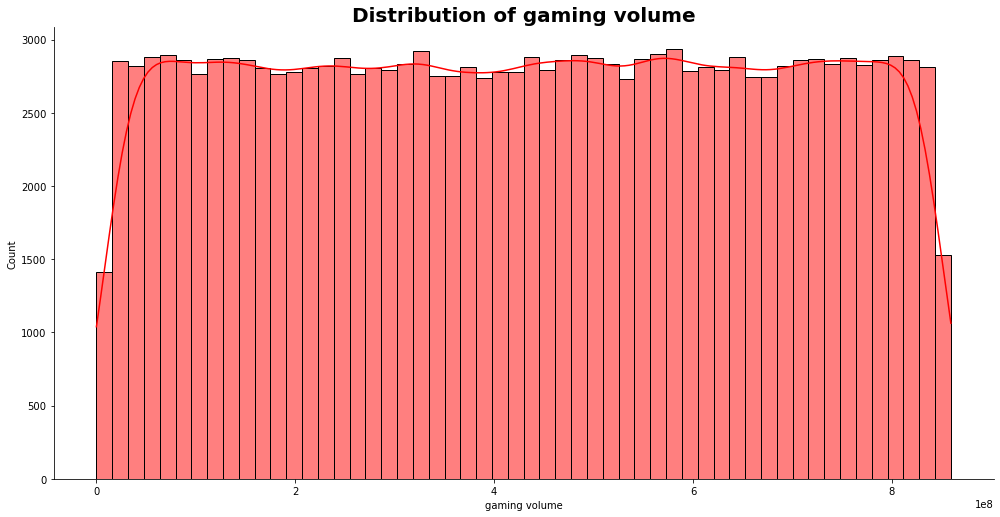

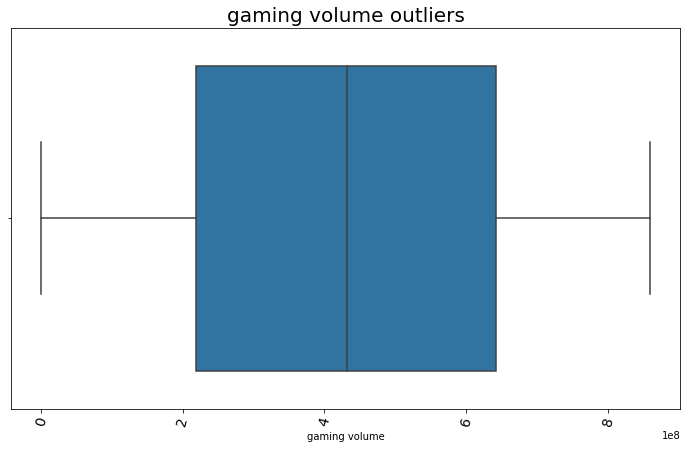

In [181]:
plot_hist(df_clean, "gaming volume", "red")
plot_box(df_clean, "gaming volume", "gaming volume outliers")

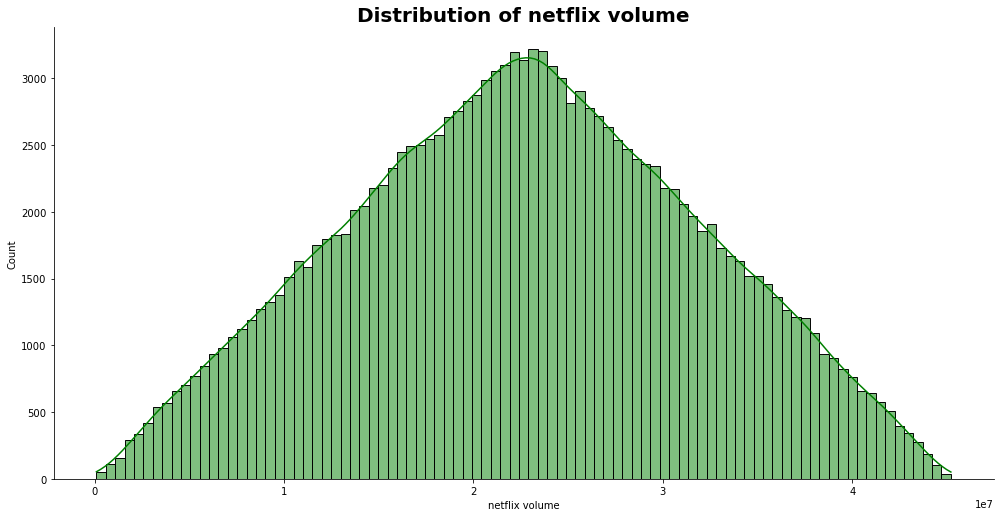

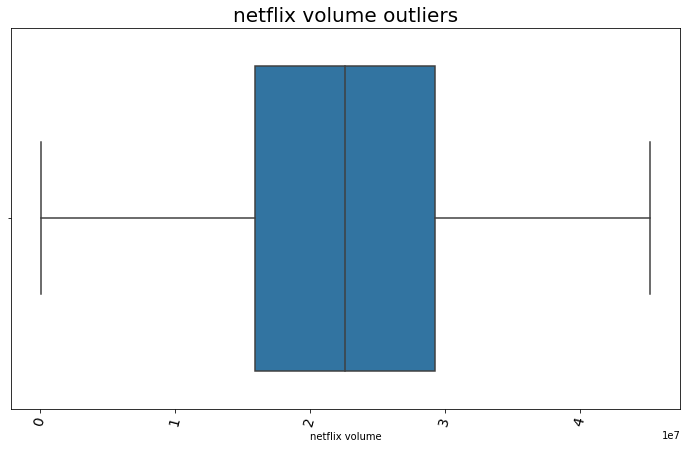

In [30]:
plot_hist(df_clean, "netflix volume", "green")
plot_box(df_clean, "netflix volume", "netflix volume outliers")

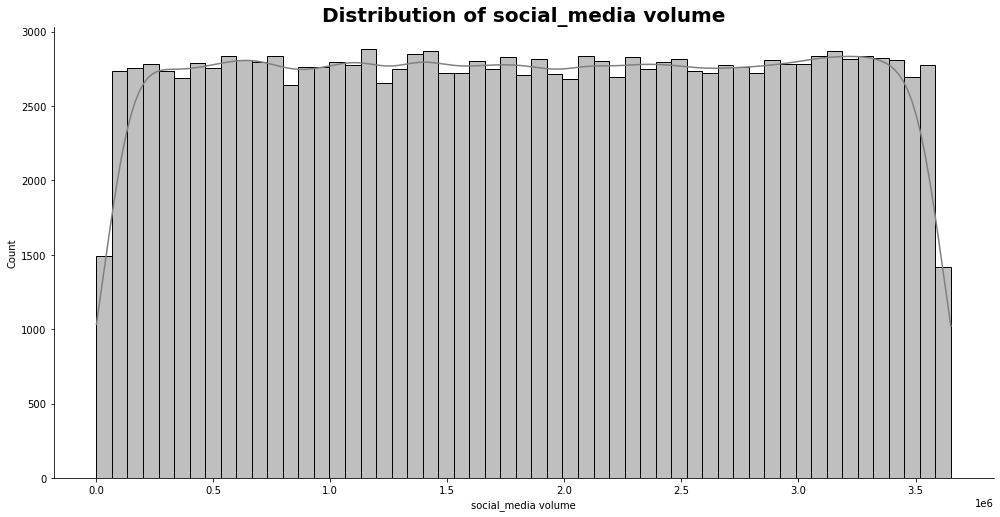

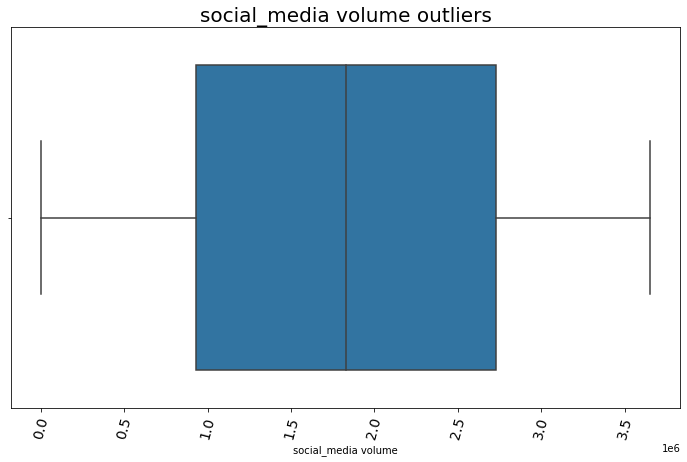

In [31]:
plot_hist(df_clean, "social_media volume", "grey")
plot_box(df_clean, "social_media volume", "social_media volume outliers")

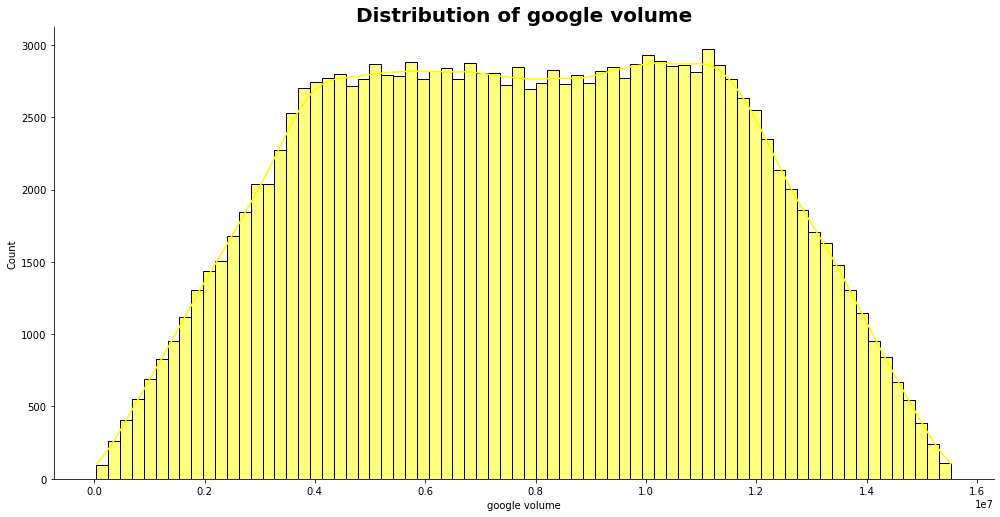

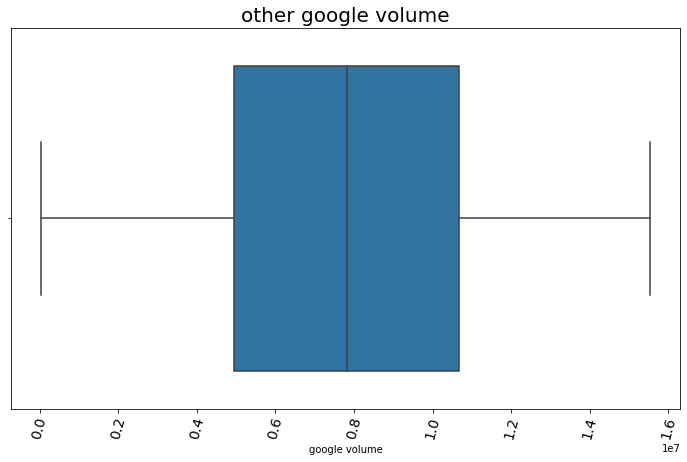

In [32]:
plot_hist(df_clean, "google volume", "yellow")
plot_box(df_clean, "google volume", "other google volume")

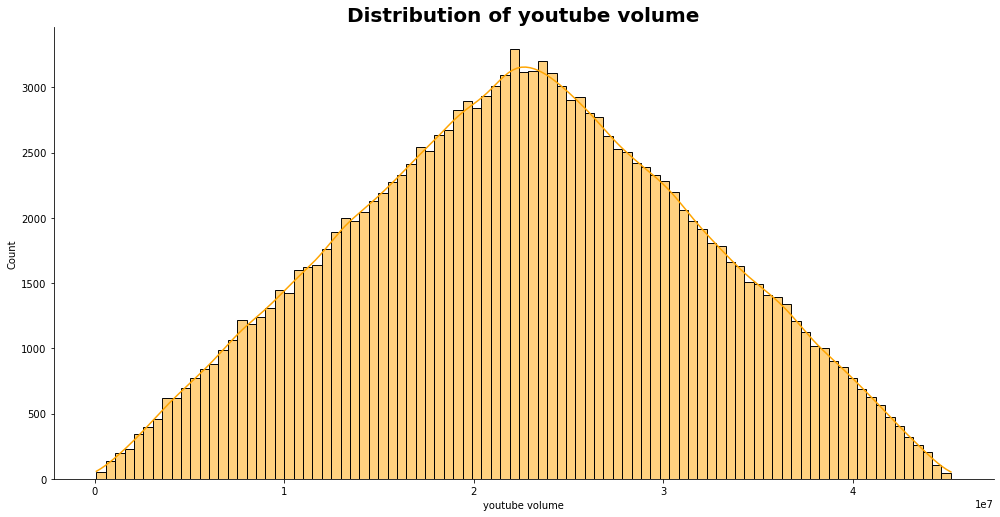

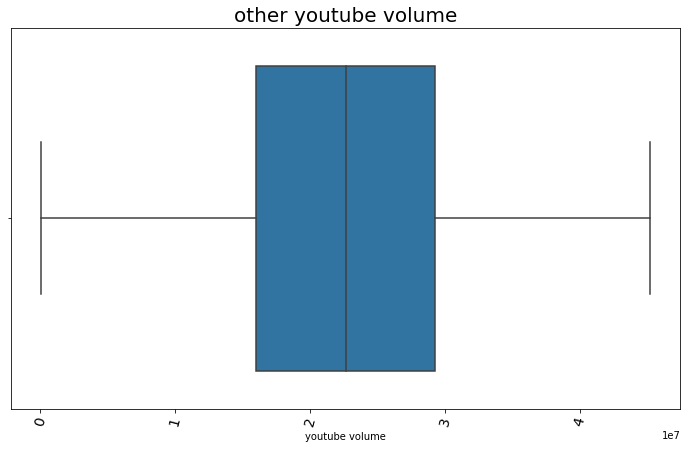

In [33]:
plot_hist(df_clean, "youtube volume", "orange")
plot_box(df_clean, "youtube volume", "other youtube volume")

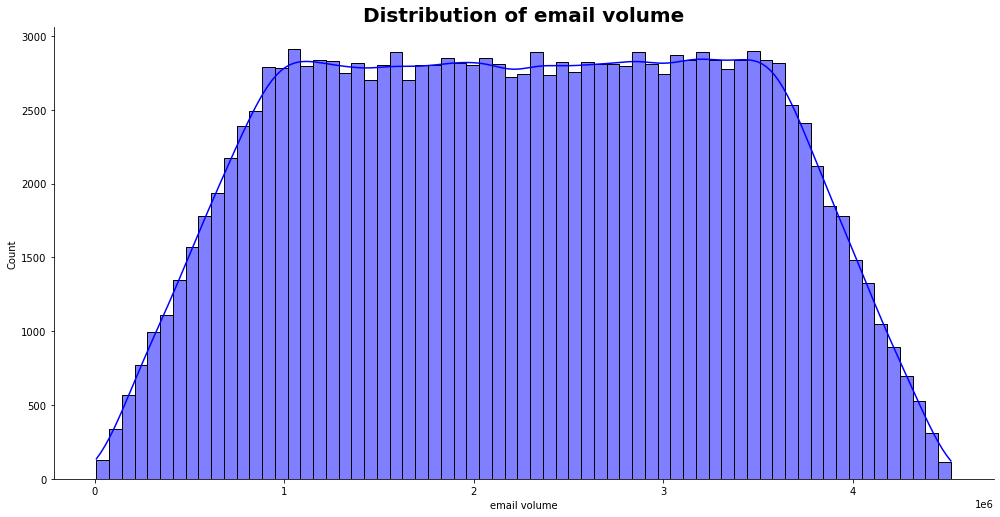

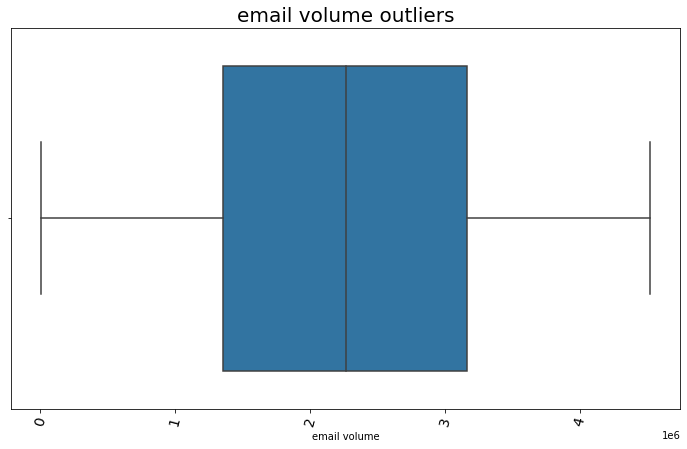

In [34]:
plot_hist(df_clean, "email volume", "blue")
plot_box(df_clean, "email volume", "email volume outliers")

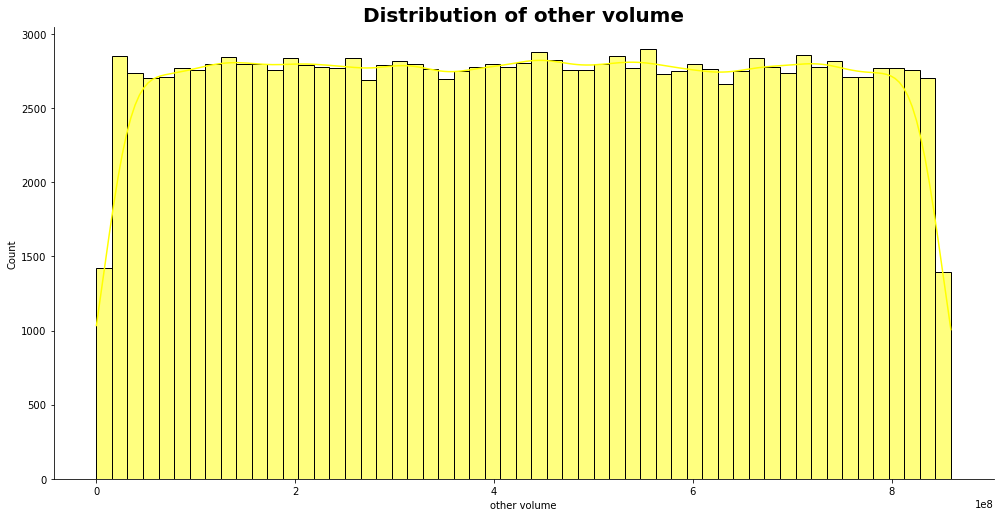

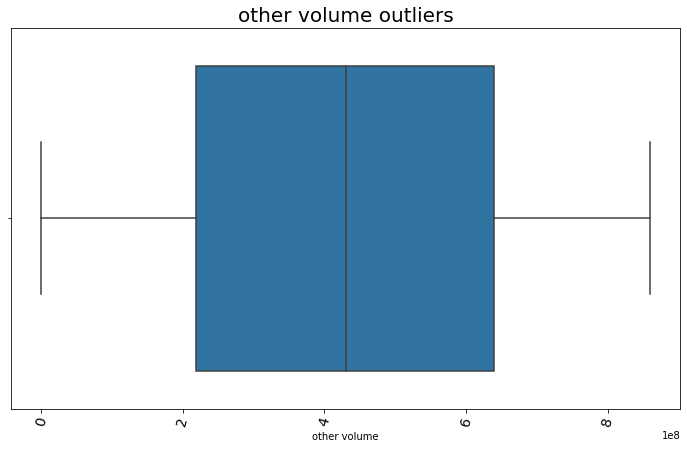

In [35]:
plot_hist(df_clean, "other volume", "yellow")
plot_box(df_clean, "other volume", "other volume outliers")

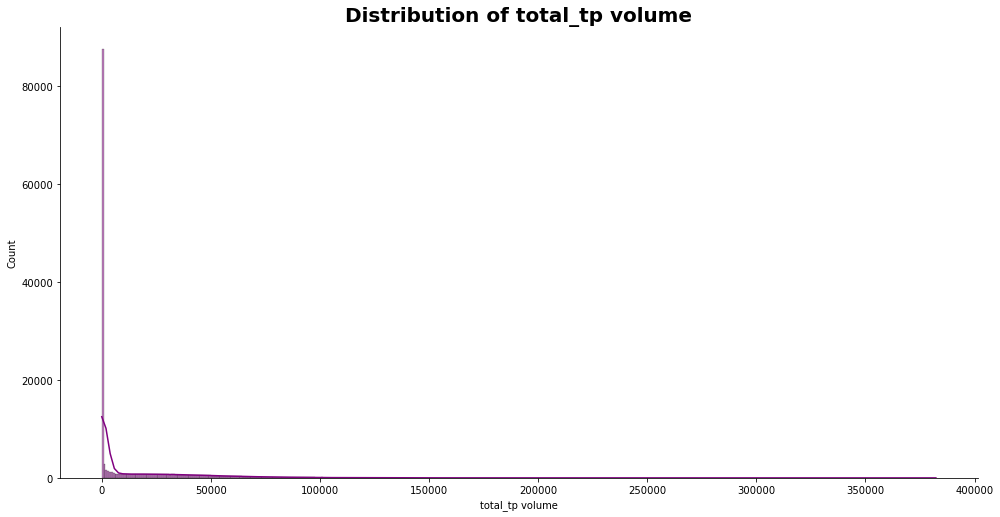

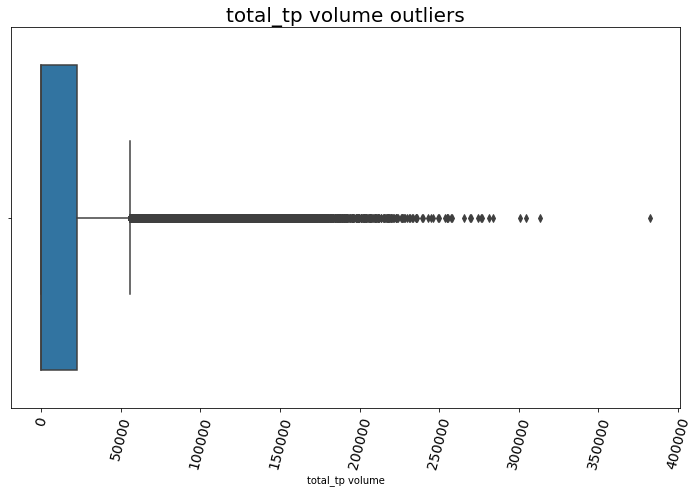

In [36]:
plot_hist(df_clean, "total_tp volume", "purple")
plot_box(df_clean, "total_tp volume", "total_tp volume outliers")

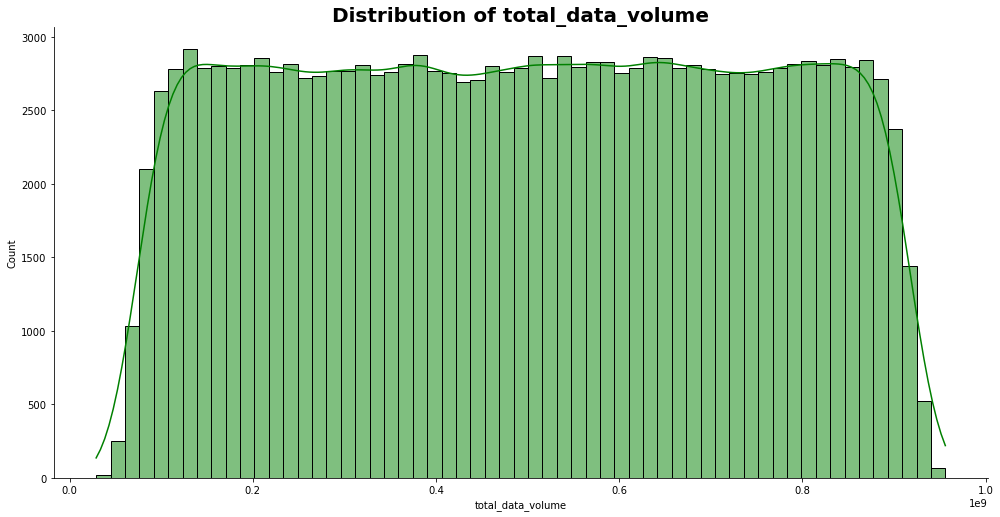

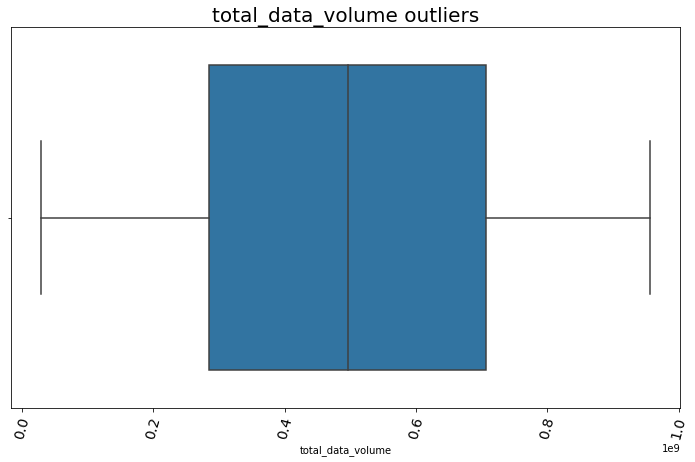

In [37]:
plot_hist(df_clean, "total_data_volume", "green")
plot_box(df_clean, "total_data_volume", "total_data_volume outliers")

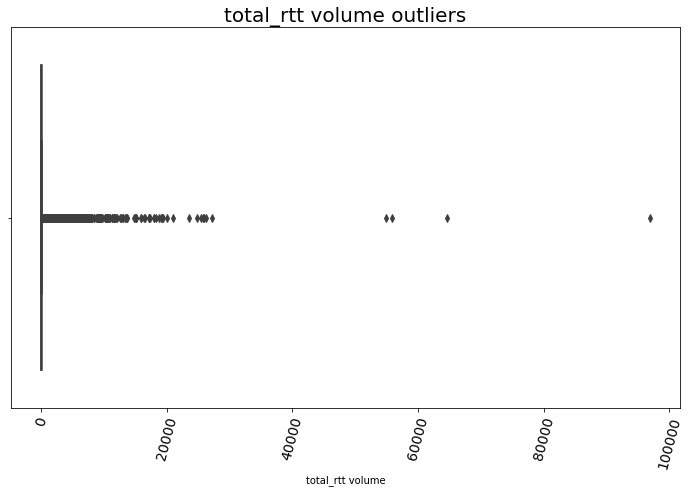

In [38]:
# plot_hist(df_clean, "total_rtt volume", "red")
plot_box(df_clean, "total_rtt volume", "total_rtt volume outliers")


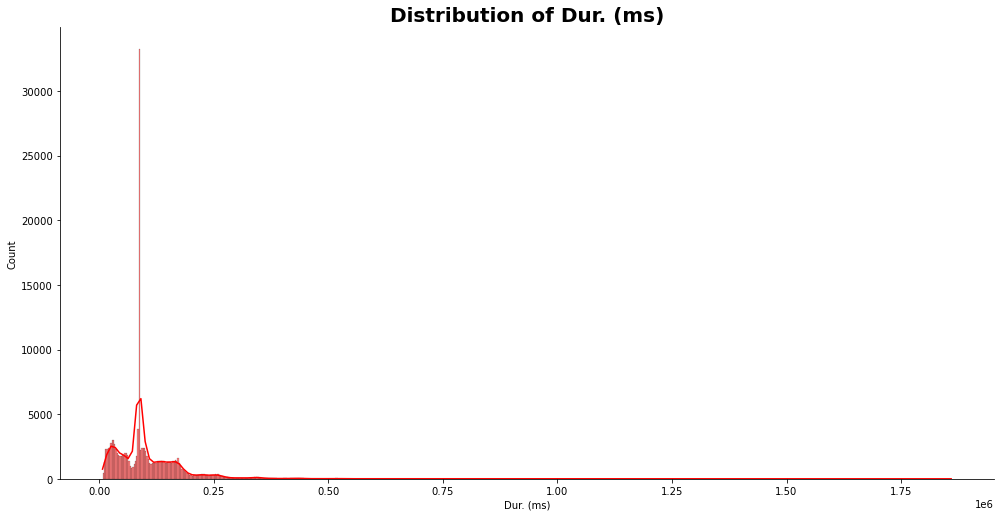

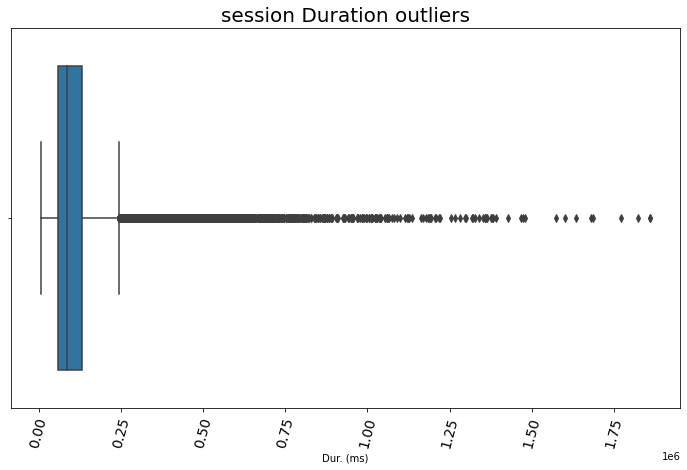

In [39]:
plot_hist(df_clean, "Dur. (ms)", "red")
plot_box(df_clean, "Dur. (ms)", "session Duration outliers")


##### fixing outliers from columns : Dur. (ms), total_rtt volume and total_tp volume


In [40]:
df_clean["fixed_Dur. (ms)"] = fix_outlier(df_clean, "Dur. (ms)")
df_clean["fixed_total_rtt volume"] = fix_outlier(df_clean, "total_rtt volume")
df_clean["fixed_total_tp volume"] = fix_outlier(df_clean, "total_tp volume")

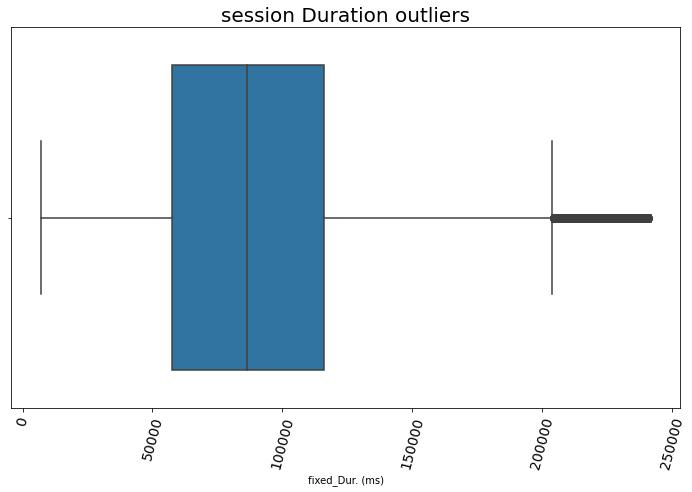

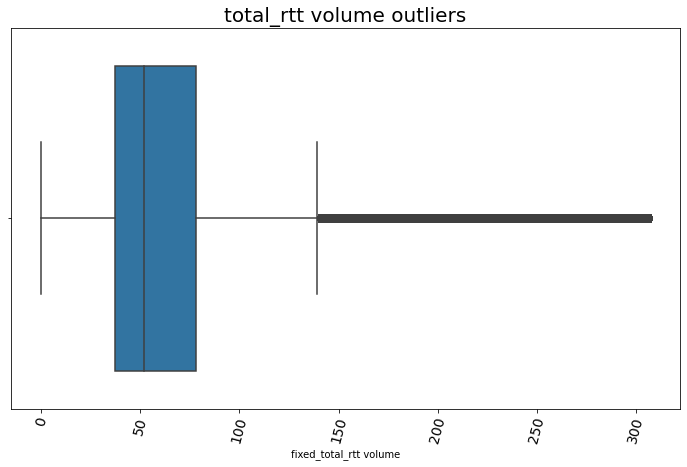

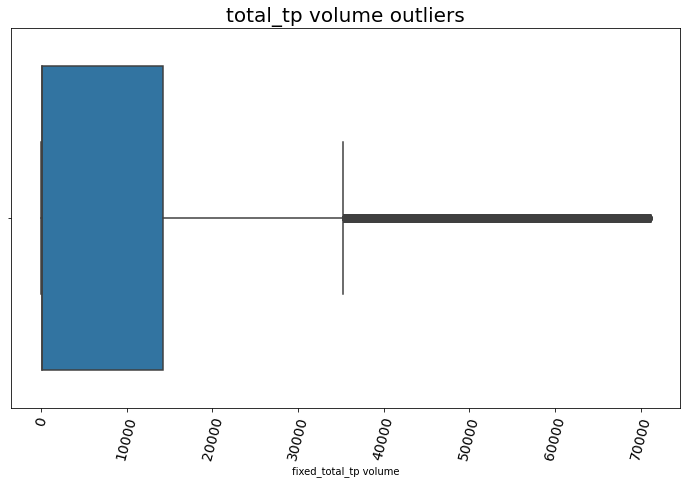

In [41]:
plot_box(df_clean, "fixed_Dur. (ms)", "session Duration outliers")
plot_box(df_clean, "fixed_total_rtt volume", "total_rtt volume outliers")
plot_box(df_clean, "fixed_total_tp volume", "total_tp volume outliers")

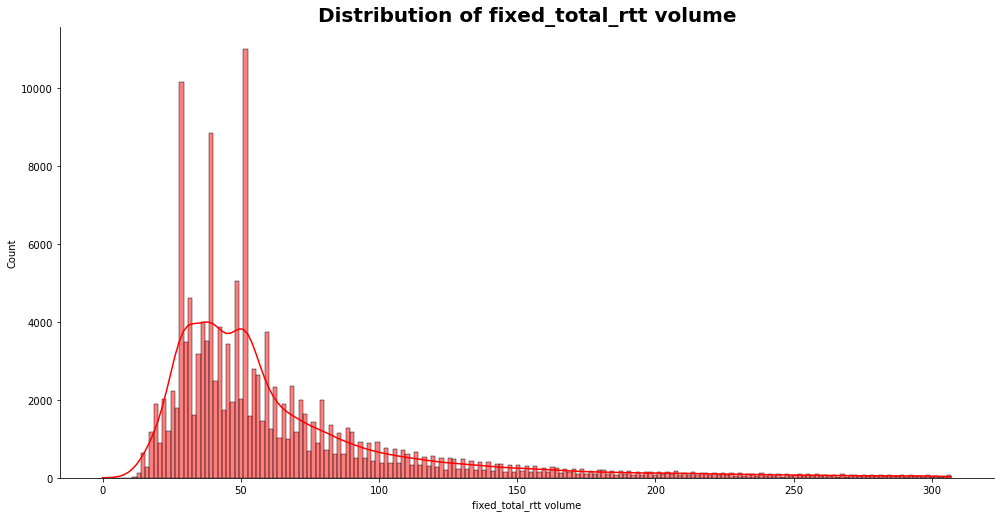

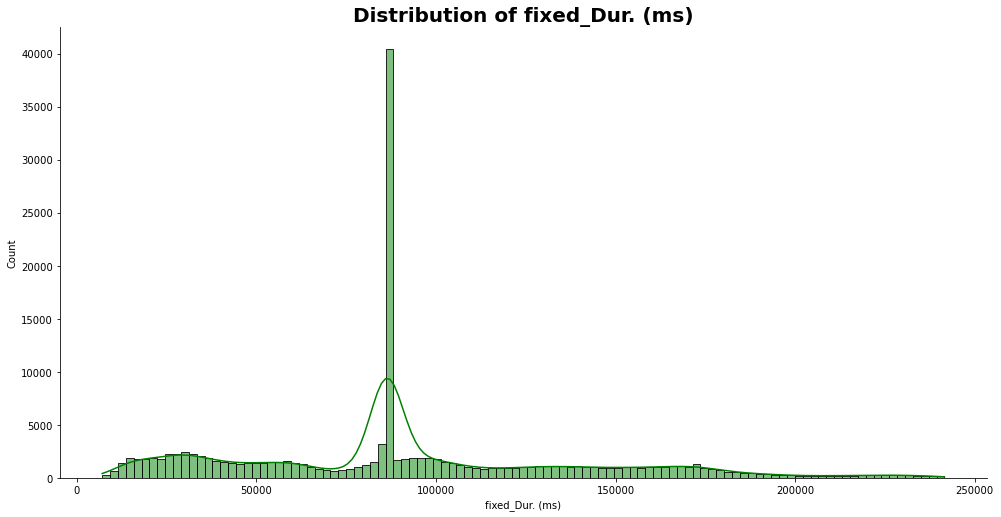

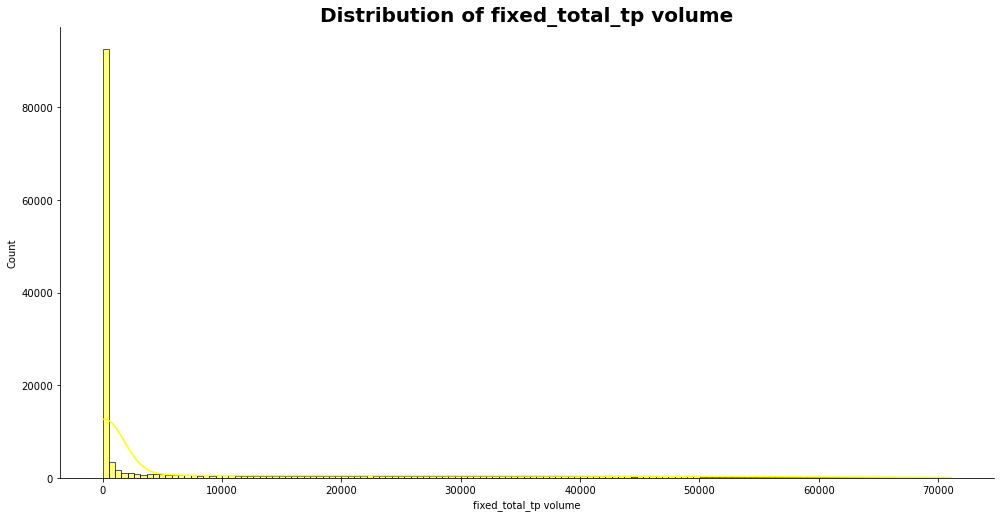

In [42]:
plot_hist(df_clean, "fixed_total_rtt volume", "red")
plot_hist(df_clean, "fixed_Dur. (ms)", "green")
plot_hist(df_clean, "fixed_total_tp volume", "yellow")


### Bivariate Analysis 

#### scatter plots showing the relationship between apps and the total voulume 

In [43]:
df_clean.head(1)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),IMEIdiag_3,total_data_volume,social_media volume,email volume,google volume,youtube volume,netflix volume,gaming volume,other volume,total_tp volume,total_rtt volume,fixed_Dur. (ms),fixed_total_rtt volume,fixed_total_tp volume
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"86,399.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00","35,521,209,507,511.00","345,629,377.00","1,570,185.00","3,701,304.00","2,905,912.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00",67.00,47.00,"86,399.00",47.00,67.00


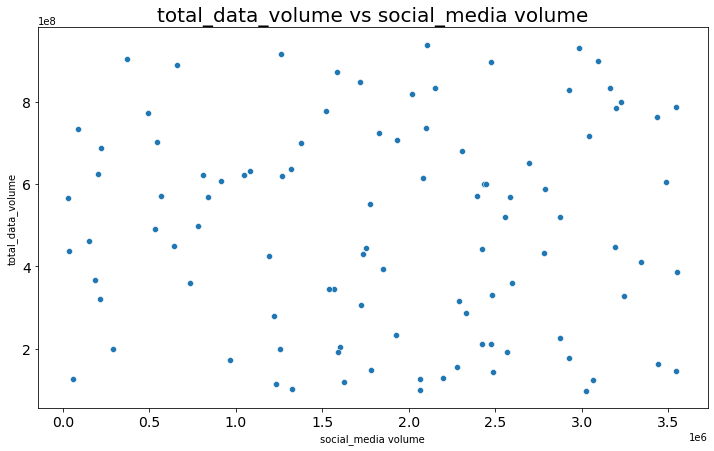

In [44]:
plot_scatter(df_clean.head(100), x_col="social_media volume", y_col="total_data_volume", 
             title="total_data_volume vs social_media volume")


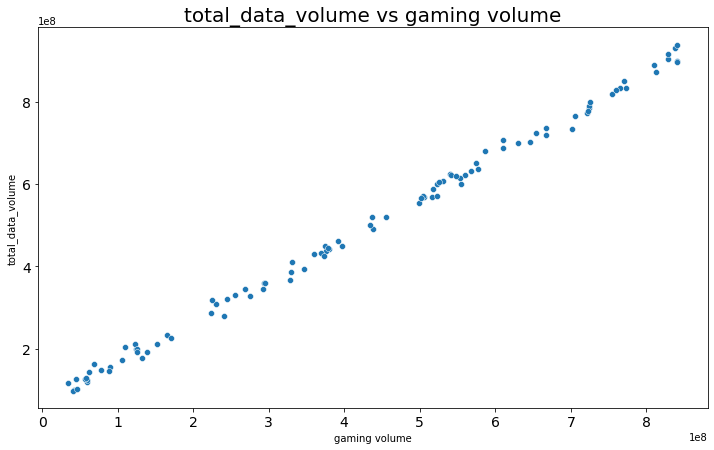

In [45]:
plot_scatter(df_clean.head(100), x_col="gaming volume", y_col="total_data_volume", 
             title="total_data_volume vs gaming volume")


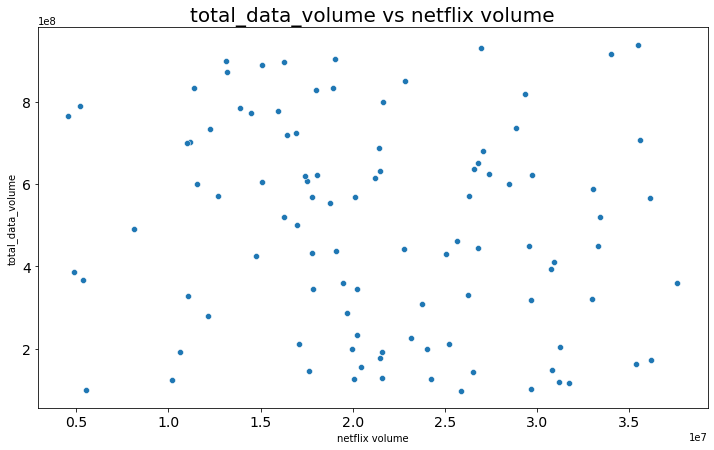

In [46]:
plot_scatter(df_clean.head(100), x_col="netflix volume", y_col="total_data_volume", 
             title="total_data_volume vs netflix volume")


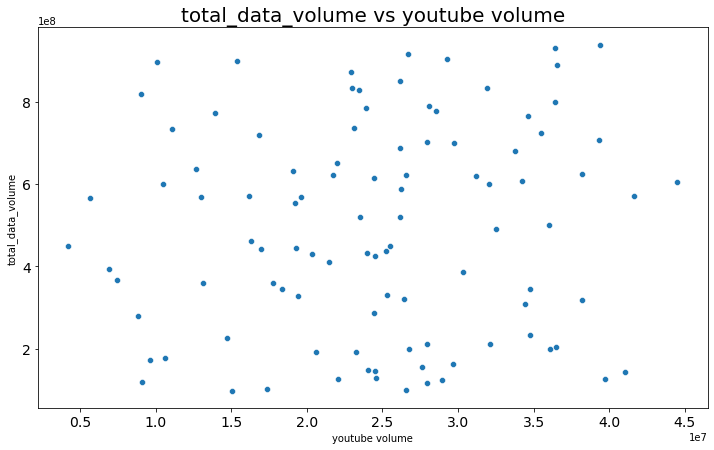

In [47]:

plot_scatter(df_clean.head(100), x_col="youtube volume", y_col="total_data_volume", 
             title="total_data_volume vs youtube volume")


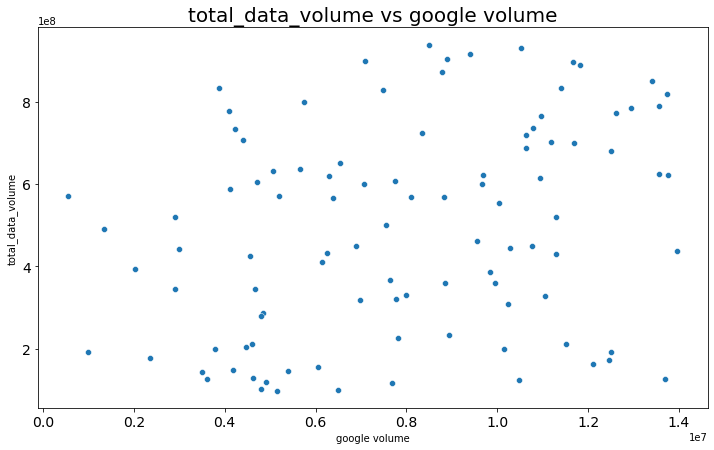

In [48]:
plot_scatter(df_clean.head(100), x_col="google volume", y_col="total_data_volume", 
             title="total_data_volume vs google volume")


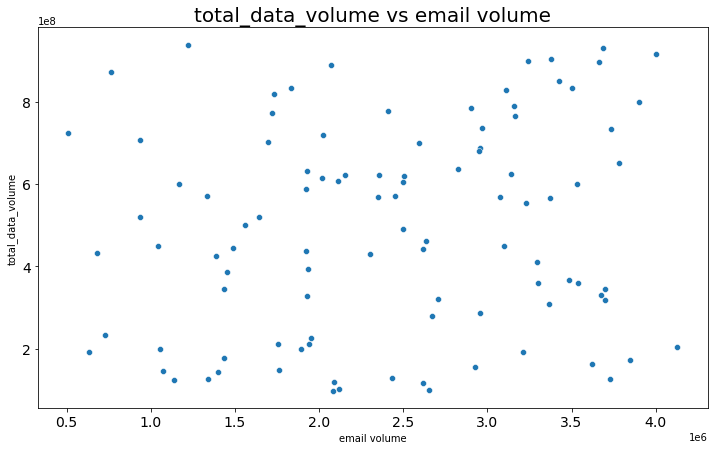

In [49]:

plot_scatter(df_clean.head(100), x_col="email volume", y_col="total_data_volume", 
             title="total_data_volume vs email volume")


### Variable transformations 

##### segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [50]:
# segment the users into top five decile classes based on the total duration for all sessions
df_clean['Decile_classes'] = pd.qcut(df_clean['Dur. (ms).1'], 5, labels = False)

In [51]:
# compute the total data (DL+UL) per decile class
columns  = df_clean[['Decile_classes', 'total_data_volume']]
decile_grouped = columns.groupby('Decile_classes').sum()
decile_grouped

,total_data_volume
Decile_classes,
0,"14,884,042,464,242.00"
1,"14,925,411,767,871.00"
2,"14,782,820,248,864.00"
3,"14,854,480,898,281.00"
4,"14,918,341,598,419.00"


### Correlation Analysis 

#### correlation matrix on Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

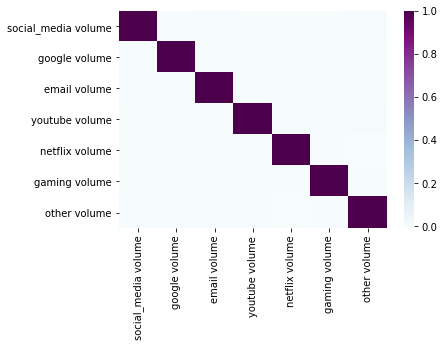

In [52]:
corr_columns_df = df_clean[['social_media volume', 'google volume', 'email volume', 'youtube volume', 'netflix volume', 'gaming volume', 'other volume']]
corrMatrix = corr_columns_df.corr()
sns.heatmap(corrMatrix, annot=False,cmap="BuPu")
plt.show()

### Dimensionality Reduction 

#### PCA to reduce the dimensions of data 

In [53]:
df_clean.head(1)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),IMEIdiag_3,total_data_volume,social_media volume,email volume,google volume,youtube volume,netflix volume,gaming volume,other volume,total_tp volume,total_rtt volume,fixed_Dur. (ms),fixed_total_rtt volume,fixed_total_tp volume,Decile_classes
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"86,399.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00","35,521,209,507,511.00","345,629,377.00","1,570,185.00","3,701,304.00","2,905,912.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00",67.00,47.00,"86,399.00",47.00,67.00,4


In [58]:
# selecting only numerical values from the whole dataframe
numerical_values = [] 
for col in df_clean.columns:
    if df_clean[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical_values.append(col)
# numerical_values

In [63]:
#drop the id col
seg = df_clean[numerical_values].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) 


In [ ]:
# initialise the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)# TRANSFORM THE DATA

In [60]:
df_clean.shape

(150001, 60)

In [64]:
scaled_data.shape

(150001, 54)

In [86]:
# INSTATIATE PCA
pca = PCA(n_components = 2)

In [87]:
# fit the data
pca.fit(scaled_data)

PCA(n_components=2)

In [88]:
# tranform the data
x_pca = pca.transform(scaled_data)


In [89]:
# compare the orginals
scaled_data.shape

(150001, 54)

In [90]:
# PCA  data (PCA reduced the data to the first 2 principal columns)
x_pca.shape

(150001, 2)

Text(0, 0.5, 'Second principal component')

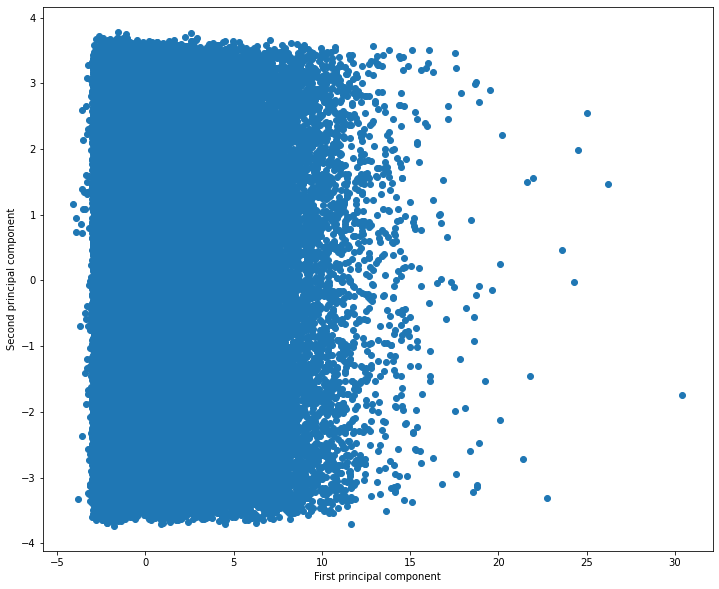

In [92]:
plt.figure(figsize=(12,10))
plt.scatter(x_pca[:,0], x_pca[:,1],  cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

## 2. User Engagement analysis
In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))

In [94]:
user_data = df_clean[['MSISDN/Number', 'total_data_volume', 'Dur. (ms).1', 'Bearer Id']]
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_data_volume': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00"


#### Top 10 users with high sessions frequency

Text(0.5, 1.0, ' 10 users with highest number of sessions')

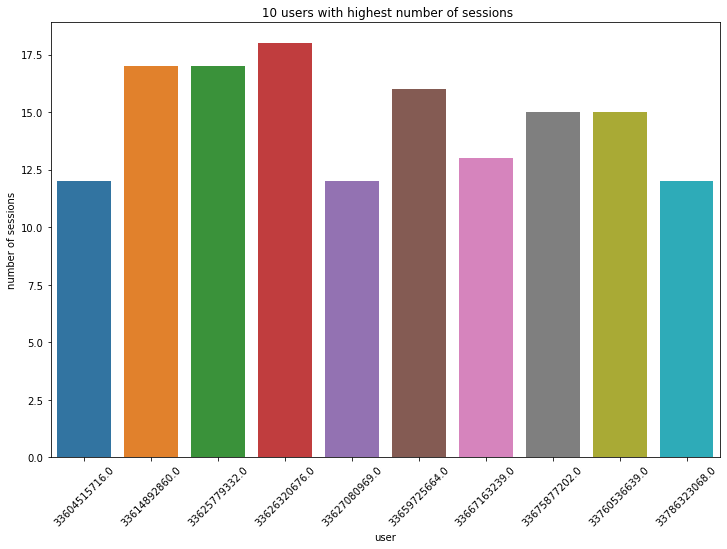

In [97]:
a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = a.index, y = a['sessions_freq'])
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title(' 10 users with highest number of sessions')

#### Top 10 users with high sessions traffic

Text(0.5, 1.0, ' 10 users with highest sessions traffic')

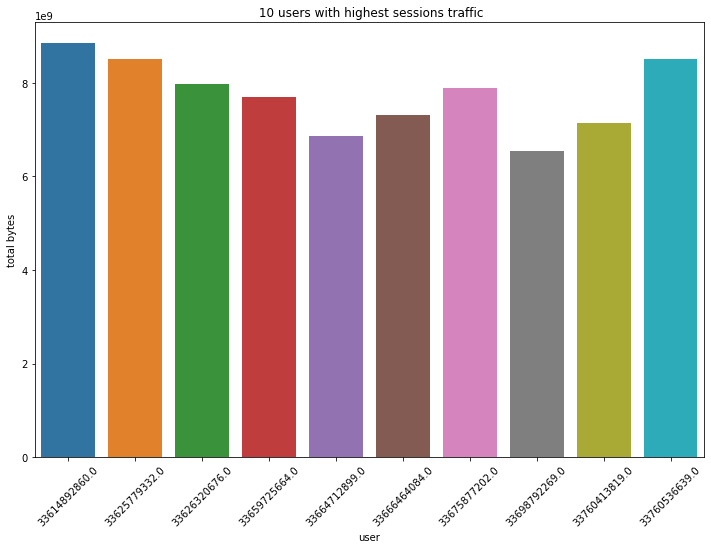

In [96]:
b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'])
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title(' 10 users with highest sessions traffic')

#### Top 10 users with longest sessions duration

Text(0.5, 1.0, '10 users with longest sessions duration')

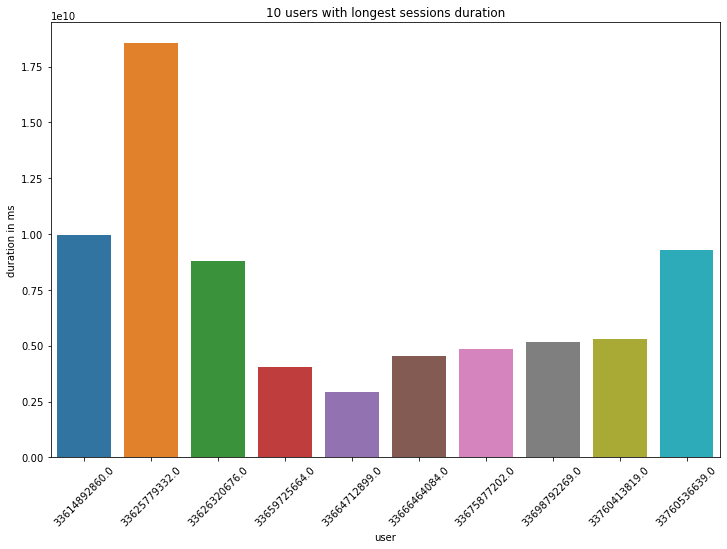

In [98]:
c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_duration(ms)'])
plt.ylabel('duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('10 users with longest sessions duration')

### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [99]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
"33,601,001,722.00",0.69,18.58,20.59
"33,601,001,754.00",0.69,19.02,18.87
"33,601,002,511.00",0.69,18.72,20.21
"33,601,007,832.00",0.69,17.73,19.86
"33,601,008,617.00",1.10,17.43,21.10


In [100]:
norm_agg_user_data.shape

(106856, 3)

In [101]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

In [102]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,601,001,722.00",0.69,18.58,20.59,0
"33,601,001,754.00",0.69,19.02,18.87,0
"33,601,002,511.00",0.69,18.72,20.21,0
"33,601,007,832.00",0.69,17.73,19.86,2
"33,601,008,617.00",1.10,17.43,21.10,2


####  comparing the clusters in variable pairs

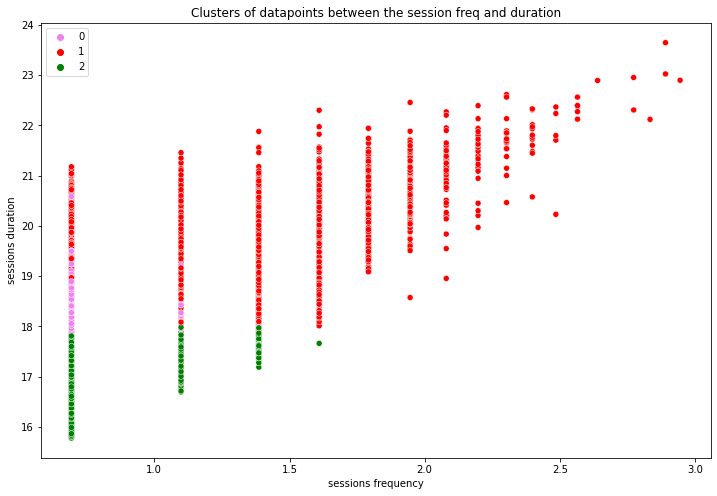

In [104]:
# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

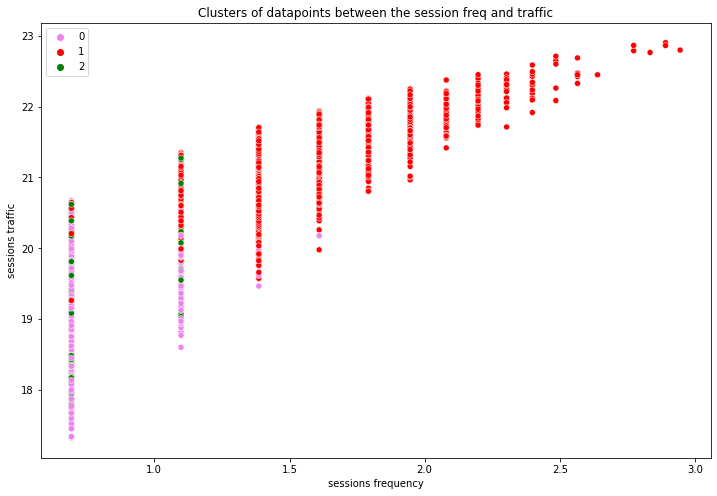

In [105]:
# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

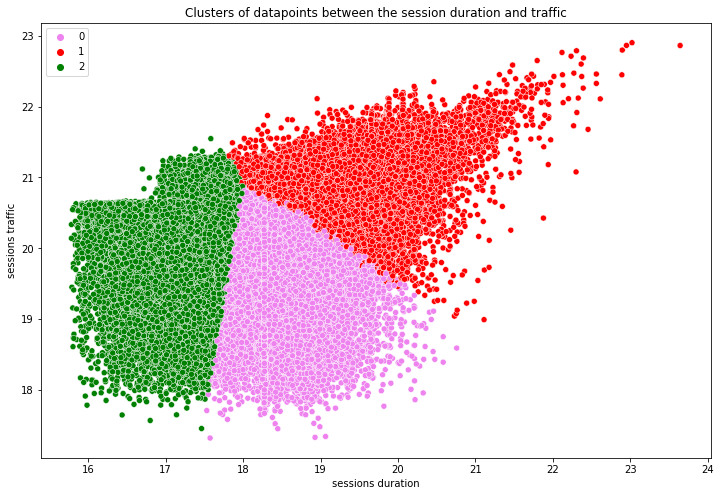

In [106]:
# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

### Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

In [107]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",0
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",0
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",0
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",2
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",2


In [108]:
agg_user_data.clusters.value_counts()

0    54547
1    29858
2    22451
Name: clusters, dtype: int64

In [109]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

(54547, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,789,955,678.00",1,"98,826,284.00","645,777,687.00",0
"33,789,960,306.00",1,"157,069,852.00","710,287,575.00",0
"33,789,967,113.00",1,"160,461,578.00","208,123,067.00",0
"33,789,997,247.00",1,"140,988,659.00","480,307,335.00",0
"882,397,108,489,451.00",1,"869,844,200.00","139,153,646.00",0


In [110]:
# get the min, max and average per metric in cluster 1
cluster_1.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"54,547.00","54,547.00","54,547.00","54,547.00"
mean,1.07,"118,032,488.20","464,574,778.76",0.00
std,0.25,"51,409,676.92","235,294,855.79",0.00
min,1.00,"41,061,780.00","33,249,009.00",0.00
25%,1.00,"86,399,918.00","266,001,829.00",0.00
50%,1.00,"98,392,082.00","453,951,703.00",0.00
75%,1.00,"141,613,903.50","650,979,045.00",0.00
max,4.00,"1,035,261,556.00","1,172,817,357.00",0.00


In [111]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

(29858, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,789,890,972.00",1,"173,035,258.00","852,939,331.00",1
"33,789,953,832.00",2,"209,051,329.00","1,540,055,115.00",1
"33,789,980,299.00",2,"210,390,146.00","1,094,693,386.00",1
"3,197,020,876,596.00",1,"877,385,325.00","232,123,971.00",1
"337,000,037,000,919.00",1,"253,030,201.00","596,287,824.00",1


In [112]:
# get the min, max and average per metric in cluster 2
cluster_2.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"29,858.00","29,858.00","29,858.00","29,858.00"
mean,2.23,"285,886,924.30","1,210,728,714.76",1.00
std,1.11,"299,070,154.94","578,750,722.38",0.00
min,1.00,"54,475,392.00","177,006,936.00",1.00
25%,2.00,"172,529,211.00","823,647,798.50",1.00
50%,2.00,"225,058,339.00","1,064,821,350.50",1.00
75%,3.00,"331,000,967.75","1,450,260,383.75",1.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",1.00


In [113]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.head()

(22451, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,789,878,384.00",1,"47,989,629.00","610,571,467.00",2
"33,789,912,614.00",1,"44,199,417.00","902,088,414.00",2
"33,789,922,012.00",1,"54,339,643.00","576,824,365.00",2
"33,789,942,399.00",1,"36,812,757.00","193,917,233.00",2
"33,789,996,170.00",1,"8,810,688.00","714,641,641.00",2


In [114]:
# get the min, max and average per metric in cluster 3
cluster_3.describe() 

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"22,451.00","22,451.00","22,451.00","22,451.00"
mean,1.12,"31,942,177.31","573,426,509.09",2.00
std,0.33,"13,520,929.06","301,068,395.29",0.00
min,1.00,"7,142,988.00","38,022,357.00",2.00
25%,1.00,"21,079,484.00","336,221,675.50",2.00
50%,1.00,"30,550,186.00","566,182,251.00",2.00
75%,1.00,"41,835,545.00","775,069,967.50",2.00
max,4.00,"66,020,769.00","2,281,757,720.00",2.00


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [116]:
apps_traffic = df_clean[['social_media volume', 'netflix volume', 'youtube volume', 
                         'google volume', 'email volume', 'gaming volume', 'other volume', 'MSISDN/Number']]
apps_traffic.head()

,social_media volume,netflix volume,youtube volume,google volume,email volume,gaming volume,other volume,MSISDN/Number
0,"1,570,185.00","17,855,187.00","18,355,943.00","2,905,912.00","3,701,304.00","292,426,453.00","180,558,843.00","33,664,962,239.00"
1,"1,933,278.00","35,565,545.00","39,359,124.00","4,414,096.00","937,385.00","609,920,783.00","541,959,383.00","33,681,854,413.00"
2,"1,726,277.00","23,751,202.00","34,425,237.00","10,229,119.00","3,363,124.00","229,980,251.00","414,908,351.00","33,760,627,129.00"
3,"657,493.00","15,092,588.00","36,534,765.00","11,811,761.00","2,070,983.00","810,387,875.00","761,837,216.00","33,750,343,200.00"
4,"912,788.00","17,539,799.00","34,222,253.00","7,748,843.00","2,110,349.00","531,237,049.00","564,619,822.00","33,699,795,932.00"


In [117]:
agg_apps_traffic = apps_traffic.groupby('MSISDN/Number').agg({'social_media volume':'sum', 'netflix volume':'sum', 'youtube volume':'sum', 'gaming volume':'sum', 
                                                            'google volume':'sum', 'email volume':'sum', 'other volume':'sum'})
agg_apps_traffic.head()

,social_media volume,netflix volume,youtube volume,gaming volume,google volume,email volume,other volume
MSISDN/Number,,,,,,,
"33,601,001,722.00","2,232,135.00","27,180,981.00","21,624,548.00","812,458,661.00","4,389,005.00","1,331,362.00","386,570,872.00"
"33,601,001,754.00","2,660,565.00","11,221,763.00","12,432,223.00","119,750,078.00","5,334,863.00","3,307,781.00","281,710,071.00"
"33,601,002,511.00","3,195,623.00","19,353,900.00","21,333,570.00","538,827,713.00","3,443,126.00","3,205,380.00","501,693,672.00"
"33,601,007,832.00","280,294.00","1,942,092.00","6,977,321.00","391,126,127.00","9,678,493.00","2,284,670.00","35,279,702.00"
"33,601,008,617.00","2,912,542.00","49,201,724.00","41,533,002.00","1,314,797,820.00","18,499,616.00","3,305,469.00","804,804,484.00"


#### 10 users with highest social media traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest social_media traffic')

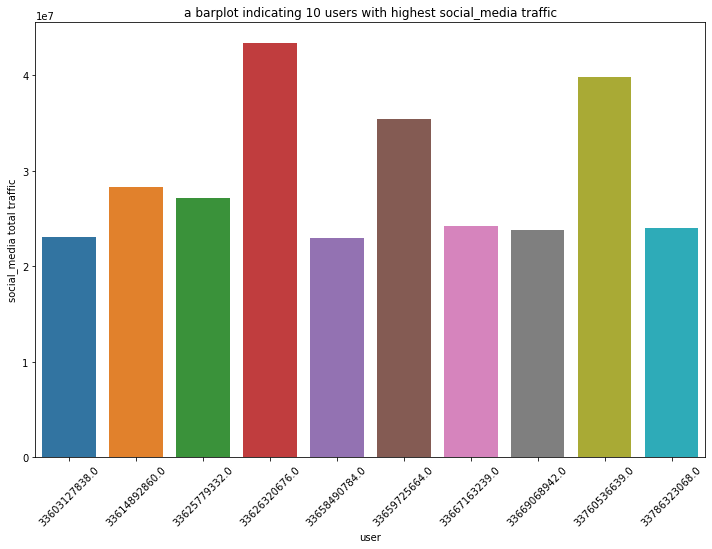

In [119]:
b = agg_apps_traffic.sort_values(by = 'social_media volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['social_media volume'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

#### 10 users with highest netflix traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest netflix traffic')

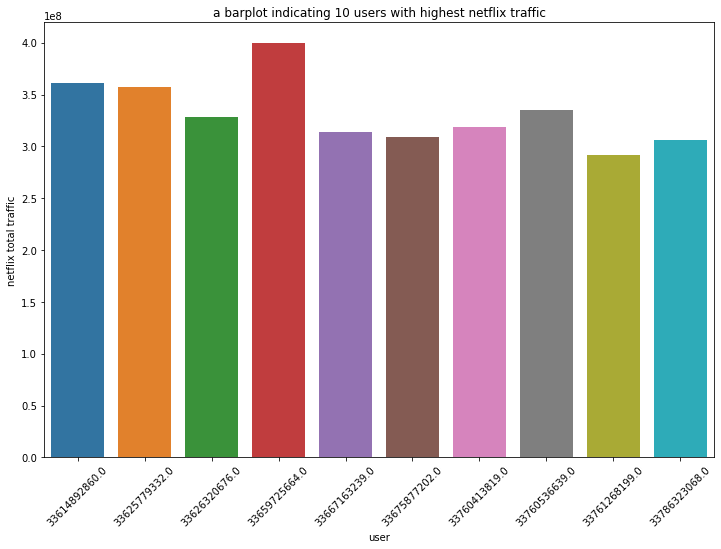

In [120]:
c = agg_apps_traffic.sort_values(by = 'netflix volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = c.index, y = c['netflix volume'])
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')

#### 10 users with highest gaming traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest gaming traffic')

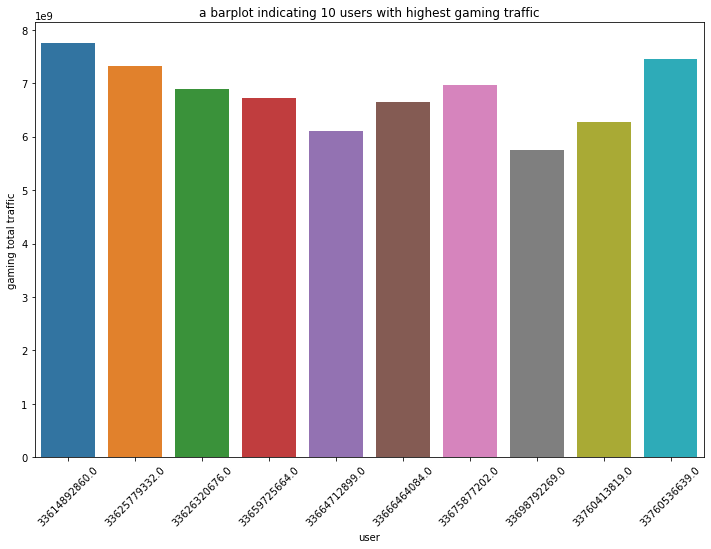

In [121]:
d = agg_apps_traffic.sort_values(by = 'gaming volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = d.index, y = d['gaming volume'])
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')

#### 10 users with highest google traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest google traffic')

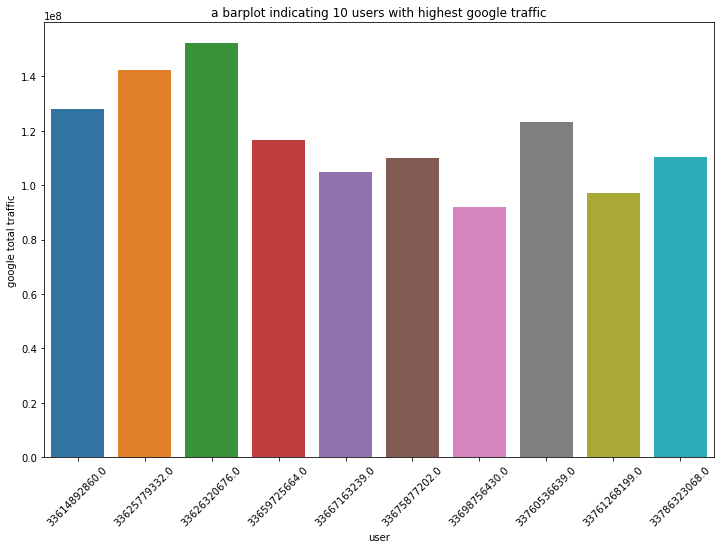

In [124]:
e = agg_apps_traffic.sort_values(by = 'google volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = e.index, y = e['google volume'])
plt.ylabel('google total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest google traffic')

#### 10 users with highest email traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest email traffic')

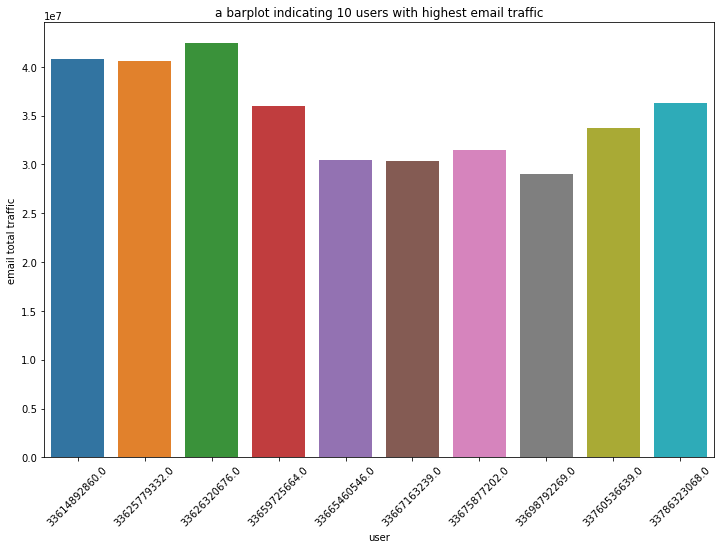

In [126]:
f = agg_apps_traffic.sort_values(by = 'email volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = f.index, y = f['email volume'])
plt.ylabel('email total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest email traffic')

#### 10 users with highest youtube traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest youtube traffic')

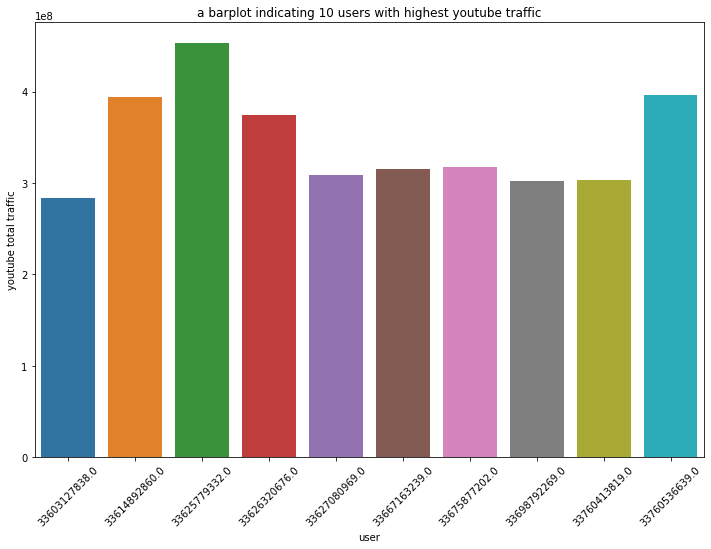

In [127]:
g = agg_apps_traffic.sort_values(by = 'youtube volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = g.index, y = g['youtube volume'])
plt.ylabel('youtube total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')

#### 10 users with highest other traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest other traffic')

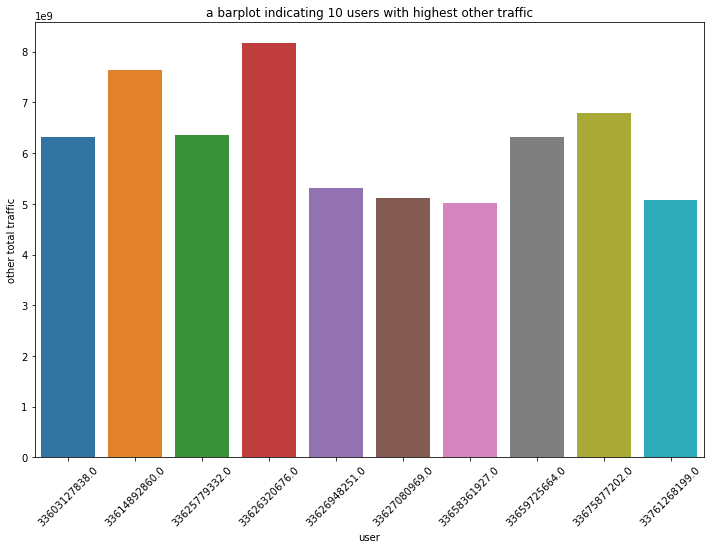

In [129]:
h = agg_apps_traffic.sort_values(by = 'other volume', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = h.index, y = h['other volume'])
plt.ylabel('other total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest other traffic')

### Plot the top 3 most used applications.
Most used applications can be determined by the Application with highest traffic data or the application with the most users.


In [130]:
agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()  
agg_apps_traffic.tail()

,social_media volume,netflix volume,youtube volume,gaming volume,google volume,email volume,other volume
MSISDN/Number,,,,,,,
33789997247.0,"498,569.00","8,531,060.00","19,851,572.00","437,003,292.00","5,429,705.00","2,514,097.00","211,115,113.00"
3197020876596.0,"715,224.00","26,592,300.00","11,959,905.00","178,048,738.00","10,438,660.00","1,520,771.00","470,526,473.00"
337000037000919.0,"521,566.00","30,905,042.00","36,734,940.00","510,142,695.00","9,830,617.00","3,318,582.00","149,188,439.00"
882397108489451.0,"1,546,088.00","28,846,230.00","40,940,710.00","43,070,260.00","9,218,647.00","3,330,974.00","401,360,457.00"
total_app_traffic,"274,239,359,454.21","3,394,313,609,363.54","3,396,545,039,272.64","64,550,395,439,016.70","1,171,101,989,130.55","338,867,605,596.31","64,405,230,908,181.62"


Text(0.5, 0, 'application')

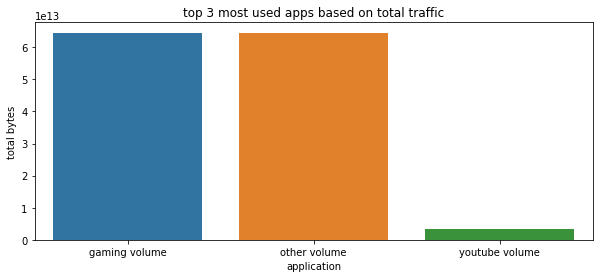

In [131]:
a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(10,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

In [132]:
# the user engagement metrics df (already normalized due to different units of measurement)
norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
"33,601,001,722.00",0.69,18.58,20.59
"33,601,001,754.00",0.69,19.02,18.87
"33,601,002,511.00",0.69,18.72,20.21
"33,601,007,832.00",0.69,17.73,19.86
"33,601,008,617.00",1.10,17.43,21.10


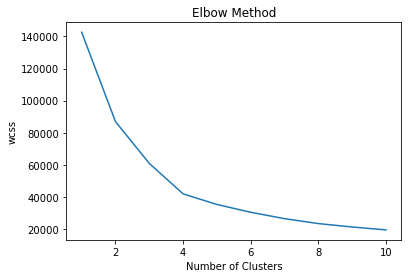

In [133]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",0
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",3
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",0
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",2
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",2


In [135]:
#clusters df
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]

In [136]:
# descriptions
cluster_1.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"46,161.00","46,161.00","46,161.00","46,161.00"
mean,1.20,"117,492,651.16","689,590,526.82",0.00
std,0.41,"44,929,215.17","234,605,714.15",0.00
min,1.00,"42,717,135.00","346,708,805.00",0.00
25%,1.00,"86,399,907.00","513,280,182.00",0.00
50%,1.00,"102,069,711.00","665,967,185.00",0.00
75%,1.00,"148,204,648.00","817,048,896.00",0.00
max,4.00,"351,882,382.00","2,287,799,730.00",0.00


In [137]:
cluster_2.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"20,513.00","20,513.00","20,513.00","20,513.00"
mean,2.55,"346,847,781.91","1,343,684,913.40",1.00
std,1.15,"342,603,185.96","632,735,757.42",0.00
min,1.00,"77,275,887.00","177,006,936.00",1.00
25%,2.00,"208,478,319.00","915,733,105.00",1.00
50%,2.00,"272,470,175.00","1,216,788,951.00",1.00
75%,3.00,"373,564,655.00","1,608,646,529.00",1.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",1.00


In [138]:
cluster_3.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"19,168.00","19,168.00","19,168.00","19,168.00"
mean,1.08,"28,799,420.05","550,724,296.31",2.00
std,0.28,"11,446,426.68","265,940,003.97",0.00
min,1.00,"7,142,988.00","46,047,479.00",2.00
25%,1.00,"19,397,598.75","343,981,032.25",2.00
50%,1.00,"28,127,529.00","538,320,062.00",2.00
75%,1.00,"36,905,096.75","741,497,222.50",2.00
max,3.00,"59,105,895.00","1,974,767,270.00",2.00


In [139]:
cluster_4.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,"21,014.00","21,014.00","21,014.00","21,014.00"
mean,1.03,"123,773,181.62","210,032,203.71",3.00
std,0.16,"67,509,468.56","82,299,016.28",0.00
min,1.00,"18,645,697.00","33,249,009.00",3.00
25%,1.00,"86,399,888.00","138,208,363.75",3.00
50%,1.00,"101,053,874.00","209,753,472.00",3.00
75%,1.00,"153,491,926.25","282,117,569.75",3.00
max,3.00,"1,042,254,379.00","354,669,257.00",3.00


## 3. Experience Analytics

In [142]:
net_data = db[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

net_data.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,42.00,5.00,23.00,44.00,NaN,NaN
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),65.00,5.00,16.00,26.00,NaN,NaN
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),NaN,NaN,6.00,9.00,NaN,NaN
3,"33,750,343,200.00",undefined,NaN,NaN,44.00,44.00,NaN,NaN
4,"33,699,795,932.00",Samsung Sm-G390F,NaN,NaN,6.00,9.00,NaN,NaN


#### handling missing values